<a href="https://colab.research.google.com/github/joenguyen309/CS114.M11.KHCL/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TEAM HDL MEMBER 


1.   Nguyen Hong Lac - 18520966
2.   Nguyen Phan Hoang Duc - 18520614
3.   Pham Trung Hoa - 18520765



##TOPIC:

Predict Algorithm Timerun

Input: Data's size X

Output: Timerun Y

There are 3 files: data2,data3,data4 which data2 is data train, data3 and data4 are  data test

Using Linear Regression 1 variable
##UPDATE
Using Polynomial Regression to pre processing data.

Deadline: 25/Nov/2021 -> 2/Dec/2021

In [1]:
# Download data
%%capture
!wget https://cs.uit.edu.vn/data2.txt
!wget https://cs.uit.edu.vn/data3.txt
!wget https://cs.uit.edu.vn/data4.txt

In [2]:
# Add lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [3]:
train = pd.read_csv('data2.txt',header=None).to_numpy() # read train
test1  = pd.read_csv('data3.txt',header=None).to_numpy() # read test1
test2  = pd.read_csv('data4.txt',header=None).to_numpy() # read test2

#Process data in train
train = train[train[:,0]>0.4*1e7] # This will remove all data <= 0.4*1e7
#Call StandarScaler for pre-processing
scaler = StandardScaler()
#Base on link:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
x_train,y_train = scaler.fit_transform(train[:, :1]), train[:, 1:]
x_test1,y_test1 = scaler.transform(test1[:, :1]), test1[:, 1:]
x_test2,y_test2 = scaler.transform(test2[:, :1]), test2[:, 1:]

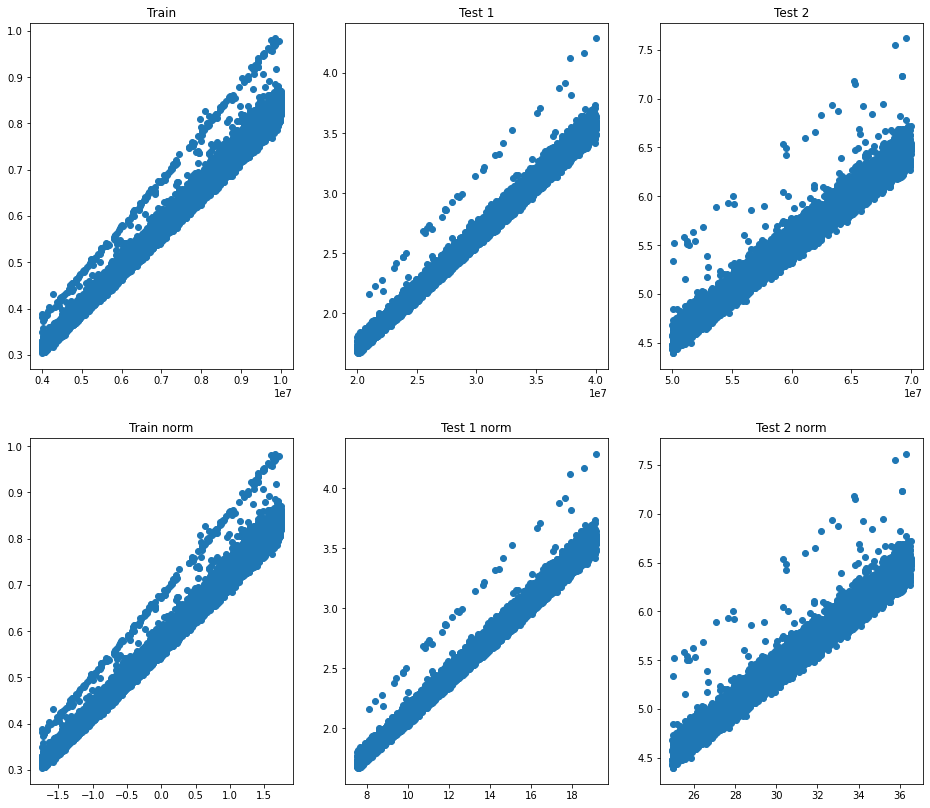

In [4]:
#plot data
# copy from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# 1 figure 1 subplot
fig,data_plot = plt.subplots(2, 3, figsize=(16, 14))

data_plot[0][0].scatter(train[:, :1], train[:, 1:])
data_plot[0][0].set_title('Train')

data_plot[0][1].scatter(test1[:, :1], test1[:, 1:])
data_plot[0][1].set_title('Test 1')

data_plot[0][2].scatter(test2[:, :1], test2[:, 1:])
data_plot[0][2].set_title('Test 2')

# After pre-processing data 

data_plot[1][0].scatter(x_train, y_train)
data_plot[1][0].set_title('Train norm')

data_plot[1][1].scatter(x_test1, y_test1)
data_plot[1][1].set_title('Test 1 norm')

data_plot[1][2].scatter(x_test2, y_test2)
data_plot[1][2].set_title('Test 2 norm')

plt.show()


In [5]:
#about the shape of train, test1, test2
train.shape, test1.shape, test2. shape

((42646, 2), (10590, 2), (6023, 2))

#Train model and Run base on Test 1 and Test 2

In [6]:
lr = LinearRegression() # call model Linear Regression
lr.fit(x_train,y_train) 

LinearRegression()

In [7]:
train_predict = lr.predict(x_train)
r2_score_train = r2_score(y_train,train_predict)


test1_predict = lr.predict(x_test1)
r2_score_test1 = r2_score(y_test1,test1_predict)

test2_predict = lr.predict(x_test2)
r2_score_test2 = r2_score(y_test2,test2_predict)


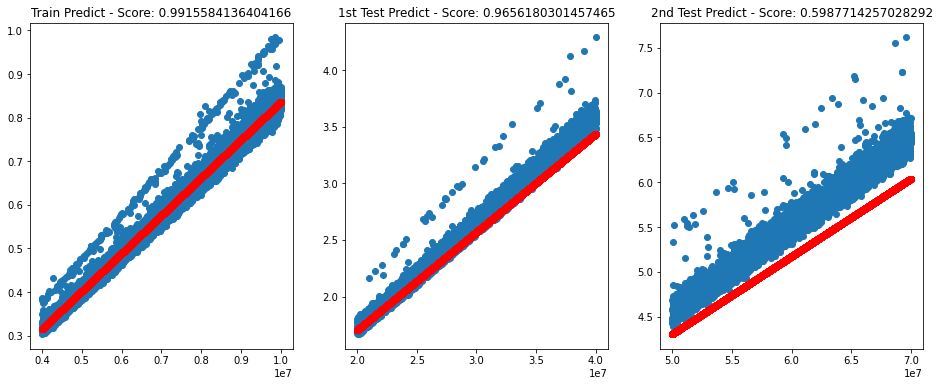

In [8]:

figure,data_plot = plt.subplots(1,3,figsize = (16,6))

data_plot[0].scatter(scaler.inverse_transform(x_train), y_train) 
data_plot[0].scatter(scaler.inverse_transform(x_train), train_predict, c='r') 
data_plot[0].set_title('Train Predict - Score: {}'.format(r2_score_train))

data_plot[1].scatter(scaler.inverse_transform(x_test1), y_test1) 
data_plot[1].scatter(scaler.inverse_transform(x_test1), test1_predict, c='r')
data_plot[1].set_title('1st Test Predict - Score: {}'.format(r2_score_test1))

data_plot[2].scatter(scaler.inverse_transform(x_test2), y_test2) 
data_plot[2].scatter(scaler.inverse_transform(x_test2), test2_predict, c='r')
data_plot[2].set_title('2nd Test Predict - Score: {}'.format(r2_score_test2))


plt.show()

After traning, Test1 has r2 score = 0.965 as expected, but Test2 only have 0.598 r2 score. To make r2 score of Test2 highly -> Using Polynominal Regression to normalization data 

#POLYNOMIAL REGRESSION

In [9]:
# Base on fomular
# y = 𝞱_1 log(x) + 𝞱_2 *x + 𝞱_3 * sqrt(x)

def polynominal_features(x):
    return np.c_[np.log(x[:, :1]), x[:, :1], x[:, :1]**0.5] 

In [10]:
x_train = polynominal_features(train)
x_test1 = polynominal_features(test1)
x_test2 = polynominal_features(test2)


x_train, y_train = scaler.fit_transform(x_train),train[:,1:]
x_test1, y_test1 = scaler.transform(x_test1),test1[:,1:]
x_test2, y_test2 = scaler.transform(x_test2),test2[:,1:]

lr.fit(x_train,y_train)

LinearRegression()

In [11]:
train_predict = lr.predict(x_train)
r2_score_train = r2_score(y_train,train_predict)


test1_predict = lr.predict(x_test1)
r2_score_test1 = r2_score(y_test1,test1_predict)

test2_predict = lr.predict(x_test2)
r2_score_test2 = r2_score(y_test2,test2_predict)


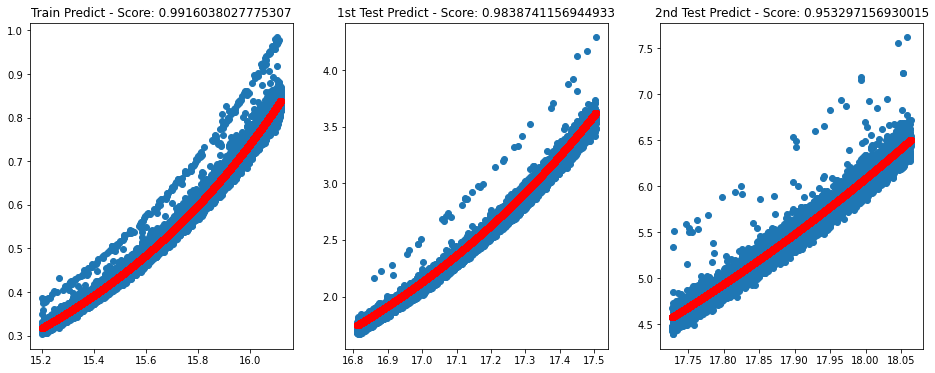

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
ax[0].scatter(scaler.inverse_transform(x_train)[:, 0], y_train) 
ax[0].scatter(scaler.inverse_transform(x_train)[:, 0], train_predict, c='r')
ax[0].set_title('Train Predict - Score: {}'.format(r2_score_train))

ax[1].scatter(scaler.inverse_transform(x_test1)[:, 0], y_test1) 
ax[1].scatter(scaler.inverse_transform(x_test1)[:, 0], test1_predict, c='r')
ax[1].set_title('1st Test Predict - Score: {}'.format(r2_score_test1))

ax[2].scatter(scaler.inverse_transform(x_test2)[:, 0], y_test2) 
ax[2].scatter(scaler.inverse_transform(x_test2)[:, 0], test2_predict, c='r')
ax[2].set_title('2nd Test Predict - Score: {}'.format(r2_score_test2))

plt.show()

After using Polynomial Regression base on fomular y =  𝞱_1 log(x) + 𝞱_2 *x + 𝞱_3 * sqrt(x), Test2's r2 score is highly as we expect = 0.9539.